# Forest Fire 

In [1]:
# Necessary imports:
import json
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

In [2]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + "/aotizhongxin_pollution_data_cleaned.csv")

# Adding an Id tag to the dataframe
dataset["Id"] = range(8282)

# Ways to visualize the data:
rows, cols = dataset.shape

# Check how many of each month we have
dataset.groupby('month').size()

# splitting up the labels and the values for each month:
feature_columns = ['PM2.5','PM10','SO2','NO2','CO','O3']
X = dataset[feature_columns].values
Y = dataset['month'].values

# Encoding Labels (Turning string species names into integers)
# setosa -> 0
# versicolor -> 1
# virginica -> 2
le = LabelEncoder()
Y = le.fit_transform(Y)

dataset

,month,PM2.5,PM10,SO2,NO2,CO,O3,Id
0,1,209,268,47,123,5300,13,0
1,1,211,248,66,119,5400,16,1
2,1,167,192,64,115,4300,12,2
3,1,136,159,56,111,4100,9,3
4,1,108,121,46,107,3600,7,4
5,1,93,108,42,107,3400,7,5
6,1,107,126,36,108,4000,7,6
7,1,113,126,29,97,3700,7,7
8,1,89,94,26,85,2300,7,8
9,1,91,116,22,84,2800,6,9


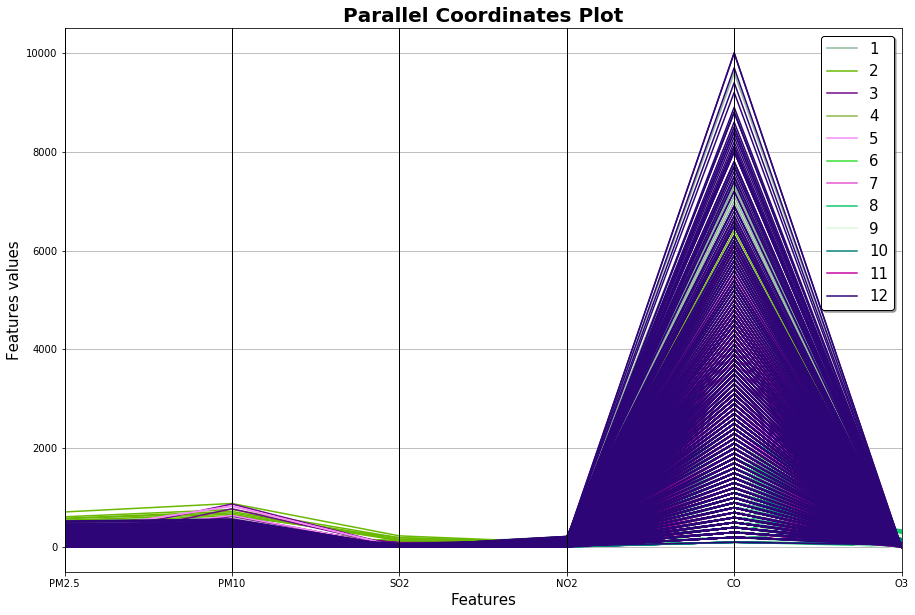

In [3]:
# Data Visualization:
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "month")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [4]:
# Splitting into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=350)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=350, p=2,
                     weights='uniform')

In [5]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')
cm = confusion_matrix(Y_test, Y_pred)
cm

[ 0  1  9 ...  1 11  1]
Accuracy of model: 24.34 %.


array([[113,  38,   0,   0,   1,   1,   1,  24,   0,  43,  39,  90],
       [ 46, 145,   1,   9,   3,   6,   6,  25,   1,  55,  12,  27],
       [ 17,  74,  15,  22,  15,  20,  21,   6,   3,  81,  17,  60],
       [  3,  46,   4,  78,  34,  44,  33,   5,   5,  71,  16,   7],
       [ 10,  57,   5,  30,  40,  81,  27,   8,  16,  48,   1,   4],
       [ 16,  40,   7,   5,  30, 122,  58,  17,   9,  40,   3,   0],
       [ 27,  35,   1,   2,  20,  82,  70,  40,   7,  74,   5,   0],
       [ 30,  39,  11,  13,  34,  63,  29,  40,  16,  51,  10,   1],
       [ 20,  48,  14,  11,  22,  44,  49,  17,  41,  67,   0,   0],
       [ 29,  19,   6,  11,  18,   8,  13,   6,  21, 171,  35,   8],
       [ 32,  40,   1,   4,   5,   5,   0,   3,   7, 107,  25, 118],
       [ 30,  68,   3,   5,  10,   0,   0,   2,   2,  63,  28, 148]])

<Figure size 432x288 with 0 Axes>

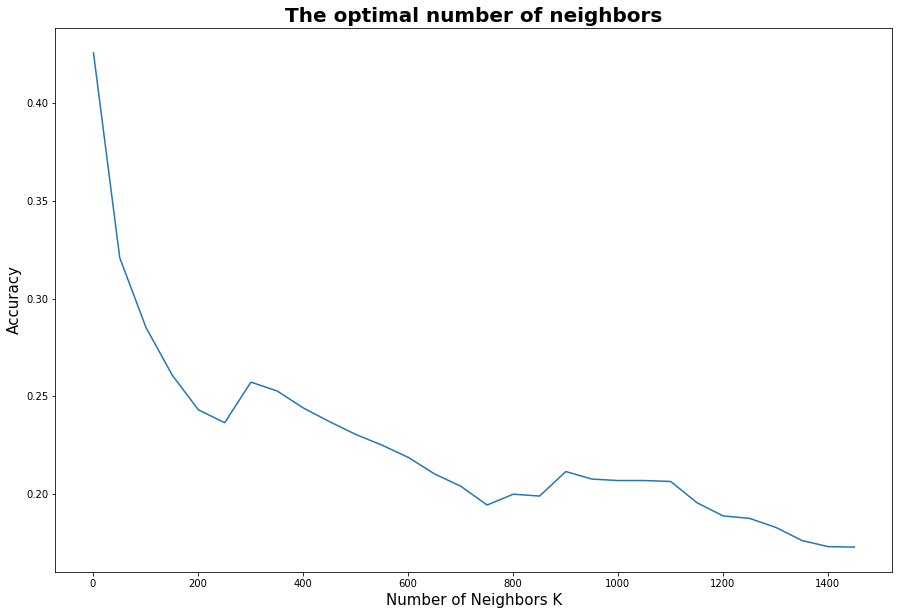

In [6]:
# creating list of cv scores
cv_scores = []
k_list = range(1, 1500, 50)

# perform 10-fold cross validation
for k in range(1, 1500, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

In [ ]:
import urllib
import time
from flask import requests
from flask import Flask

# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to flower names
    classes = ['1','2','3','4','5','6','7','8','9','10','11','12']
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ['PM2.5','PM10','SO2','NO2','CO','O3']]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?PM2.5=NUM&PM10=NUM&SO2=NUM&NO2=NUM&CO=NUM&O3=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run()

# try 127.0.0.1:5000?PM2.5=7&PM10=7&SO2=2&NO2=22&CO=500&O3=47